In [1]:
import numpy as np
import pandas as pd

In [2]:
movies_df = pd.read_csv("movies.csv",usecols=["movieId","title"],dtype = {"movieId":"int32","title":"str"})
rating_df = pd.read_csv("ratings.csv",usecols=["userId","movieId","rating"],dtype = {"userId":"int32","movieId":"int32","rating":"float32"})

In [3]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
df = pd.merge(rating_df,movies_df,on="movieId")
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [6]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

### Movie Rating Count

To find out how many people has rated each and every movie that is present in the dataset.

In [7]:
movie_rating_count = (
                     df.groupby(by = ["title"])["rating"].count(). #Grouping by "title" w.r.t. count of "rating"
                     reset_index(). # Resetting index because we dont want 'title' as index
                     rename(columns = {"rating":"total_rating_count"}) # Renaming as we are findinf total ratings per movie.
                     [["title","total_rating_count"]] # Our final 2 columns of the dataframe.
                     )
movie_rating_count.head()

,title,total_rating_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


If we want to give recommendation based on the total ratings of the movies, we can recommend the movies with the maximum ratings.

In [8]:
movie_rating_count.shape

(9719, 2)

In [9]:
print(movie_rating_count["total_rating_count"].describe())

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: total_rating_count, dtype: float64


********************************************************************************************************************

We now merge movie_rating_count with 'df' dataframe because we need the total rating count for our analysis.

In [10]:
rating_with_totalratingcount = df.merge(movie_rating_count, left_on = 'title', right_on = 'title', how = "left")
#'df' is the table on the left.'movie_rating_count' is the table on the right.
# left_on --> which field you are considering from the left dataframe
# right_on --> which field you are considering from the right dataframe
# how --> type of join. Similar to MySQL.
rating_with_totalratingcount.head()

,userId,movieId,rating,title,total_rating_count
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


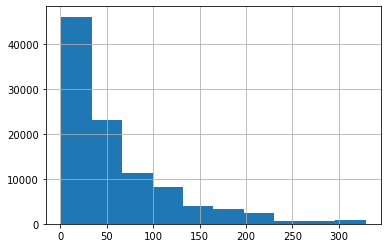

In [11]:
rating_with_totalratingcount['total_rating_count'].hist()

In [12]:
rating_with_totalratingcount['total_rating_count'].median()

39.0

Since the distribution of 'total_rating_count' is skewed, we take median to evaluate the central tendency.

We keep the threshold as 39. Whenever the total_rating_count > 39, only those movies will be considered for recommendation.

In [13]:
a = 39
df1 = rating_with_totalratingcount.query('total_rating_count >= @a')
df1.head(250)

,userId,movieId,rating,title,total_rating_count
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
245,308,3,0.5,Grumpier Old Men (1995),52
246,321,3,3.0,Grumpier Old Men (1995),52
247,330,3,3.0,Grumpier Old Men (1995),52
248,337,3,4.0,Grumpier Old Men (1995),52


In [14]:
df1.shape

(50800, 5)

### Pivot Matrix

In [15]:
movie_features_df = df1.pivot_table(index = 'title',columns = 'userId', values = 'rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The above matrix is important for cosine similarity.

In [16]:
from scipy.sparse import csr_matrix # To convert the above pivot table into an array matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

We use KNN with cosine similarity.

In [17]:
from sklearn.neighbors import NearestNeighbors
# "NearestNeighbors" is not classifier/regressor. It is unsupervised.
# We try to find out the nearest neighbor and try to group them together.

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

 For the above, the default nearest neighbor is 5. p=2 represents Euclidean distance.

************************************************************************************************************************

In [18]:
movie_features_df.shape[0]

668

In [19]:
# To verify for a new feature/movie.
query_index = np.random.choice(movie_features_df.shape[0]) # We take any random movie from "movie_feature_df".
# shape[0] will help us collect only 1 record.
print(query_index) # The one random record which will be picked up.

455


In [20]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors = 6)
# '.kneighbors' --> will try to find out which are the similar movies nearer to the movie number 325(above cell) which is the movieId.
# 'movie_features_df.iloc[query_index,:]' --> we are picking the whole record of the movieId 325.
# '.values.reshape(1,-1)' --> we get output as series. So we convert it string.
# we select nearest neighbors as 6
# Once we do this, we get two parameters - 'distance' and 'indices'.

In [21]:
# What is the distance from the movie that I am actually looking at(the recommended movie).
# How much distance it is from the original movie.
distances

array([[1.1920929e-07, 2.4608642e-01, 3.9400047e-01, 4.3287885e-01,
        4.4333798e-01, 4.5237571e-01]], dtype=float32)

In [22]:
# Will give the index position of the movies which are similar 
indices

array([[455, 456, 457, 122, 324, 436]], dtype=int64)

In [23]:
for i in range(0, len(distances.flatten())): #Flatten the distance.
    if i == 0: # The most similar movie for any movie will be the movie itself.
        print("Recommendations for {0}: \n".format(movie_features_df.index[query_index]))
    else:
        print("{0}: {1}, with distance of {2}.".format(i,movie_features_df.index[indices.flatten()[i]],distances.flatten()[i]))
# {0}/i is the numbering of similar movies.
# {1} --> is the name of the movie which is similar. # [indices.flatten()[i]] will give us the movie name 
# {2} --> is the distance similar to the random movie selected.


Recommendations for Pirates of the Caribbean: At World's End (2007): 

1: Pirates of the Caribbean: Dead Man's Chest (2006), with distance of 0.24608641862869263.
2: Pirates of the Caribbean: The Curse of the Black Pearl (2003), with distance of 0.39400047063827515.
3: Charlie and the Chocolate Factory (2005), with distance of 0.43287885189056396.
4: Iron Man (2008), with distance of 0.44333797693252563.
5: Ocean's Twelve (2004), with distance of 0.45237571001052856.
